**Nome**: *Federico*
<br>
**Cognome**: *Signoretta*
<br>
**Numero matricola**: 847343
<br>
**E-mail**: f.signoretta@campus.unimib.it
<br>
**A.A.** 2019-2020



# Digital Signal and Image Management 
- Docente: *Simone Bianco*
- Docente: *Marco Buzzelli*
- Esercitatore: *Simone Zini*

## Assignment n.4
**Descrizione**: implementare una rete neurale per la classificazione del dataset MNIST a partire dalle istruzioni viste ad esercitazione.

Seguire la seguente struttura:

- Convoluzione bidimensionale con 32 filtri 3×3
- ReLU
- Max pooling bidimensionale con filtro 2×2
- Flattening
- Fully-connected che mappi a 128 dimensioni
- ReLU
- Fully-connected che mappi alla dimensione finale del problema

### 1. Import dei pacchetti

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


### 2. Caricamento dataset MNIST e visualizzazione delle immagini

In [0]:
# Dataset predefinito offerto da keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

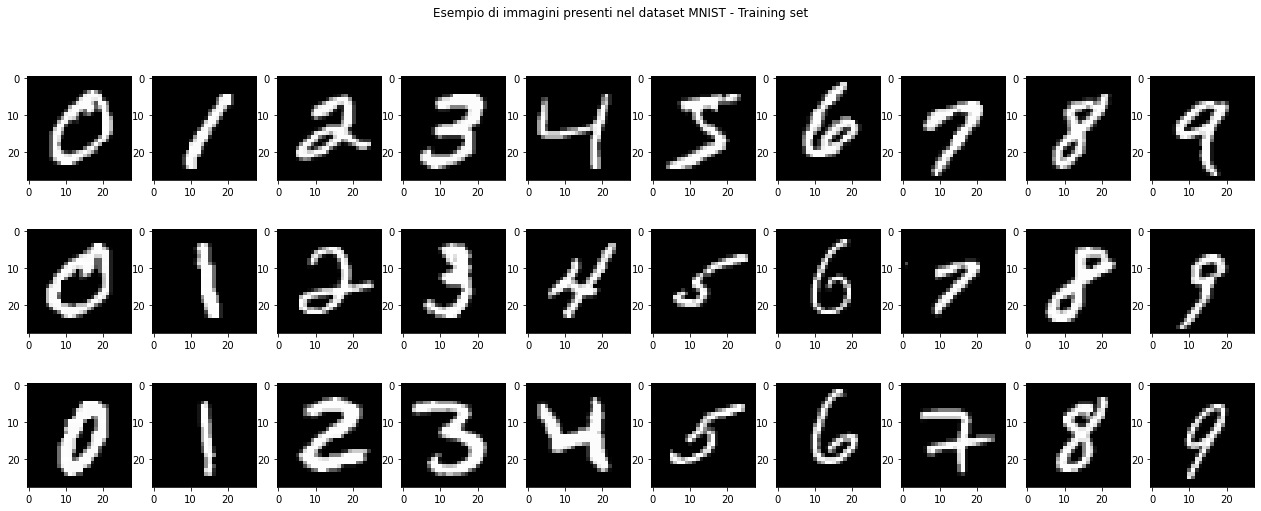

In [16]:
digits = [np.where(y_train==i)[0][:3] for i in np.unique(y_train)]
k=1
fig = plt.figure(figsize=(22,8))
for d1,d2,d3 in digits:
  fig.add_subplot(3,10,k)
  plt.imshow(X_train[d1,:,:], cmap='gray')
  fig.add_subplot(3,10,k+10)
  plt.imshow(X_train[d2,:,:], cmap='gray')
  fig.add_subplot(3,10,k+20)
  plt.imshow(X_train[d3,:,:], cmap='gray')
  k+=1
fig.suptitle('Esempio di immagini presenti nel dataset MNIST - Training set')
plt.show()

In [4]:
print('Training set:', X_train.shape)
print('Test set:', X_test.shape)

Training set: (60000, 28, 28)
Test set: (10000, 28, 28)


Il dataset preso in esame è contiene immagini di dimensione *28*x*28* di numeri da *0* a *9*, così suddivise:
- Training set: *60,000* immagini
- Test set: *10,000* immagini



### 3. Pre-processing
Le immagini e le labels, per essere processate in *keras*, hanno bisogno di essere leggermente modificate. In particolare, per le **immagini**, verrà aggiunta una dimensione dedicata al canale di colore e verrà cambiato il range di valori tra 0 e 1. Le **label** verranno trasformate attraverso il metodo *one-hot encoding*.
#### 3.1 Immagini

In [0]:
def preprocessing(X):
  X = np.expand_dims(X, axis=-1)
  X = X.astype('float32')/255.0
  return X

In [0]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

In [7]:
print('Training set:', X_train.shape)
print('Test set:', X_test.shape)

Training set: (60000, 28, 28, 1)
Test set: (10000, 28, 28, 1)


#### 3.2 Labels

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 4. Data Augmentation
Per aumentare le performance del modello, ma sopratutto per evitare l'overfitting, viene applicata la tecnica di data augmentation. Pertanto, le immagini verranno modificate in altezza, in larghezza e scalate per valori compresi tra *-0.1* e *0.1* e ruotate in un range da *-5* a *5* gradi.


In [0]:
datagen = ImageDataGenerator(height_shift_range=0.1, 
                             width_shift_range = 0.1, 
                             zoom_range = 0.1, 
                             rotation_range=5)

data_generator = datagen.flow(X_train, y_train, batch_size = 32)

### 5. Definizione della rete neurale
Vene definita la struttura delle rete neurale descrita inizialmente. 

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

La rete così implementata risulta essere piuttosto leggera. Infatti, il totale dei parametri trainabili è circa *700k*.

### 6. Addestramento della rete e risultati
#### 6.1 Addestramento
Per l'addestramento del modello verrà utilizzata come funzione di *loss* la *categorical crossentropy* e come ottimizzatore *adam*. Gli steps per epoca saranno pari alla lunghezza del train diviso *128*. Il numero di *epoche* viene fissato a *20*.

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam', metrics=['accuracy'])

steps=len(X_train)//128
%time history = model.fit(data_generator, validation_data=(X_test, y_test),steps_per_epoch=steps, epochs=20, verbose=0)

CPU times: user 2min 9s, sys: 11.1 s, total: 2min 20s
Wall time: 1min 38s


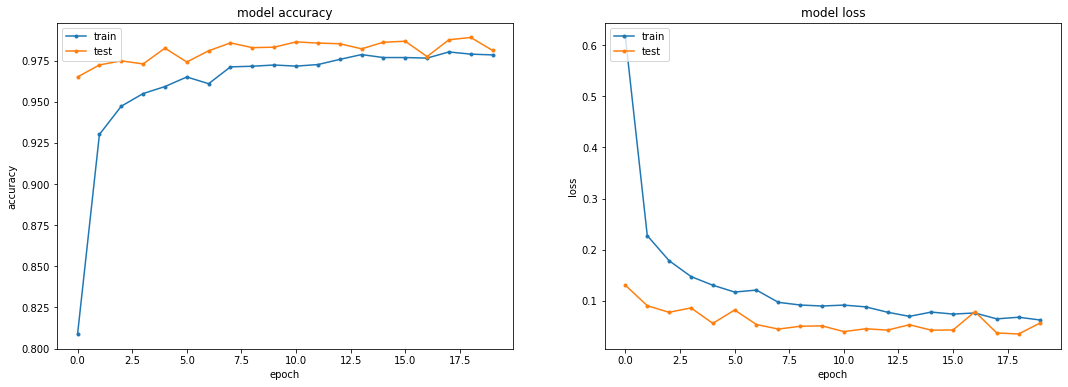

In [12]:
fig = plt.figure(figsize=(18,6))

fig.add_subplot(1,2,1)
plt.plot(history.history['accuracy'], marker='.')
plt.plot(history.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history.history['loss'], marker='.')
plt.plot(history.history['val_loss'], marker='.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 6.2 Predizione sul test set e permormance sulle classi

In [13]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.95      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.91      1.00      0.95       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### 7. Conclusioni
Sebbene la rete sia  sia semplicemente composta da uno strato convoluzionale (*Con2D* e *MaxPooling*) e da un *hidden layer* da 128 neuroni, riesce a raggiungere delle ottime performance sui dati di test. Infatti, all'incirca su tutte le classi, essa riesce a raggiungere un *f1-score* vicino al *98%*. Complicando ulteriormente la rete si potrebbero ottenere risultati migliori. L'overfitting sembra essere stato gestito nel modo corretto. Una alternativa sarebbe stata l'aggiunta di layers di *Dropout*. Il motivo di queste ottime performance sono senza dubbio dovute alla semplicità del task ed alla similarità tra le immagini di test e di train. 